*Name: Sankhya Sivakumar*

# **Topic: A Comparative Study of Semantic Similarity within Hip-Hop, Folk, and Jazz Song Lyrics**

## **Research Question**

How does semantic similarity within song lyrics differ between the genres of Hip-Hop, Folk, and Jazz?


**Null Hypothesis (H0):**

There is no significant difference in semantic similarity scores within song lyrics between the Hip-Hop, Jazz and Folk genres.


**Alternative Hypothesis (H1):**

Hip-Hop songs will have a lower level of semantic similarity within their lyrics compared to Jazz songs and also compared to Folk songs. Hip-Hop often includes innovative language use, a wide array of topics addressing social and personal themes, and frequent cultural references that contribute to a high degree of lyrical diversity. This stands in contrast to Jazz and Folk genres, which may exhibit more consistent themes and language within their lyrics, leading to higher semantic similarity scores.

## **Variables of Interest**

In this study, the variable of interest — the primary focus of the analysis — is the semantic similarity score. This is a numerical assessment that quantifies the extent to which the lyrics of songs are semantically similar.

For each song in the dataset, the semantic similarity score is computed by evaluating the semantic proximity of each word to every other word in the lyrics. If a song's lyrics often repeat certain words and phrases, or if the themes are consistent throughout, the song's semantic similarity score would be higher. Conversely, a song with a wide variety of words and themes that do not repeat would have a lower semantic similarity score.

### Example:
Illustrating the concept of semantic similarity within a song's lyrics with a concrete example -
Imagine there is a song in the Folk genre titled "Rivers and Roads." This song has lyrics that repeatedly mention words like "river," "road," "travel," and "home." These words are semantically related as they all deal with themes of journey and place. My method of calculating semantic similarity within the song would likely yield a high score because of this tight thematic grouping and the relatedness of the words in the context of travel.

Now, consider a song from the Hip-Hop genre titled "City Life." Suppose the lyrics reflect on various aspects of urban living, from "streets" to "lights," discuss personal experiences with "ambition," "struggle," and even explore broader social issues like "justice" and "equity." Each of these words taps into different semantic fields. The semantic similarity score for "City Life" would be lower than "Rivers and Roads" because the words in "City Life" cover a wider semantic range and are not as closely related in meaning.

By applying this semantic similarity analysis across the dataset, I will be able to compare these scores between individual songs and between genres. This will allow to determine if my observation holds true at scale—that Folk lyrics tend to cluster around a more limited set of themes compared to the more diverse thematic content found in Hip-Hop lyrics.

Through this comparison, I seek to validate my hypothesis about the nature of semantic diversity within song lyrics across different musical genres.

## **About the dataset**

The data for this analysis is sourced from a dataset of song lyrics compiled for genre classification, accessible on Kaggle. This dataset combines data from four different sources, which include Sparktech's 2018 Textract Hackathon dataset and three other datasets from Kaggle, namely '150K Lyrics Labeled with Spotify Valence,' 'Dataset Lyrics Musix,' and 'AZLyrics Song Lyrics.'
Apart from the original Sparktech data, the other datasets did not provide a Genre feature. In order to deal with the lack of Genre labeling, a labeling function utilizing the spotipy library and Spotify's API was developed. This methodology permitted the assignment of the most common genre to each artist based on the list of genres provided by Spotify.

The dataset consists of a range of genres - Rock, Pop, Hip-Hop, Metal, Country, Jazz, Electronic, Indie, R&B and Folk. It features lyrics from songs spanning from 1970 to 2016, though it is not comprehensive. The songs in the dataset are unequally distributed across the different genres, with Rock and Pop having the highest number of songs.

There are 5 columns in the test dataset : Song,	Song year,	Artist,	Genre,	Lyrics,	Track_id, and 5 columns in the train dataset: Artist, Song, Genre, Language, Lyrics. I will be combining the songs in the test dataset and the english songs in the train dataset, to have a comprehensive collection of songs. For the analysis, I will be random sampling 400 songs across each genre to ensure equality, and I will be looking into three specific genres i.e. Folk, Hip-Hop and Jazz to test the hypothesis. I will be focusing on the Genre and Lyrics columns for this analysis.



### **Environment Setup**

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import os
import spacy
import spacy.cli #spacy command line interface
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import re
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# download the large English language model for spaCy.
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### **Loading the data**

In [3]:
# This will prompt for authorization to access Google Drive
drive.mount('/content/drive/')

# Changing the working directory to the location of the song lyrics dataset
os.chdir("/content/drive/MyDrive/NLP/Song lyrics dataset/")

# Listing the files in the current working directory to verify presence of dataset
os.listdir()

Mounted at /content/drive/


['test.csv', 'train.csv']

In [4]:
# Load the dataset from a CSV file into a pandas dataframe
songs_df_test = pd.read_csv('test.csv')
songs_df_train = pd.read_csv('train.csv')

In [5]:
# View the columns in test dataframe
songs_df_test.columns

Index(['Song', 'Song year', 'Artist', 'Genre', 'Lyrics', 'Track_id'], dtype='object')

In [6]:
# View the columns in train dataframe
songs_df_train.columns

Index(['Artist', 'Song', 'Genre', 'Language', 'Lyrics'], dtype='object')

In [7]:
# Filter for english songs in the train dataframe
songs_df_train_english=songs_df_train[songs_df_train['Language']=='en']

In [8]:
# View the filtered dataset
songs_df_train_english.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [9]:
# choose the common columns in test and train dataframes so that they can be combined
songs_df_test = songs_df_test[['Song', 'Artist', 'Genre', 'Lyrics']]
songs_df_train_english = songs_df_train_english[['Song', 'Artist', 'Genre', 'Lyrics']]

In [10]:
# Concat the two dataframes to create a coprehensive dataset
songs_df = pd.concat([songs_df_test, songs_df_train_english], ignore_index=True, sort=False).reset_index(drop=True)

In [11]:
# Display the first few rows of the combined dataframe
songs_df.head()

,Song,Artist,Genre,Lyrics
0,craftsmanship,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...
1,come-on-out,the-elwins,Indie,Take your cold hands and put them on my face\n...
2,riot,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...
3,that-s-what-girls-do,dream-street,Pop,You ask me why I change the color of my hair\n...
4,believe-in-a-dollar,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...


In [12]:
# Display a statistical summary of the dataframe columns to understand data distribution
songs_df.describe()

,Song,Artist,Genre,Lyrics
count,258131,258132,258132,258132
unique,144377,13011,10,226412
top,home,elvis presley,Rock,"My heart is sad and lonely\nFor you I sigh, fo..."
freq,153,1598,108555,89


### **Data Preparation**

Initial data cleaning steps included converting all lyrics to lowercase to ensure uniformity and avoid duplication based on case differences. To facilitate a balanced comparison across musical genres, the dataset was sampled to equalize the number of songs from each genre. This involved randomly selecting 400 songs from each genre. The dataset was filtered to focus specifically on the genres pertinent to the study: Folk, Hip-Hop, and Jazz.

In [13]:
# Drop duplicate records of songs after the 2 datasets were combined
songs_df=songs_df.drop_duplicates()

In [14]:
# Convert all lyrics to lowercase for consistency
songs_df['Lyrics'] = songs_df['Lyrics'].str.lower()
songs_df.head()

,Song,Artist,Genre,Lyrics
0,craftsmanship,buck-65,Hip-Hop,most folks spend their days daydreaming of fin...
1,come-on-out,the-elwins,Indie,take your cold hands and put them on my face\n...
2,riot,bullet-for-my-valentine,Metal,are you ready it's time for war\nwe'll break d...
3,that-s-what-girls-do,dream-street,Pop,you ask me why i change the color of my hair\n...
4,believe-in-a-dollar,cassidy,Hip-Hop,do you believe in magic in a young girl's hear...


In [15]:
# Display the number of songs for each genre in the dataset
songs_df['Genre'].value_counts()

Genre
Rock          101889
Pop            74977
Metal          18786
Jazz           13973
Folk            8591
Indie           7347
R&B             3274
Hip-Hop         3198
Country         2700
Electronic      2665
Name: count, dtype: int64

In [16]:
# Filter the sampled dataframe to include only genres of interest for this analysis
songs_df_cleaned = songs_df[songs_df['Genre'].isin(['Hip-Hop','Folk','Jazz'])]

In [17]:
# Initialize an empty dataframe to store sampled songs
sampled_songs_df = pd.DataFrame()

# Loop through each unique genre present in the original dataframe
for genre in songs_df_cleaned['Genre'].unique():
    # Randomly sample 400 songs from each genre to balance the dataset
    genre_df = songs_df_cleaned[songs_df_cleaned['Genre'] == genre].sample(n=400, random_state=42)
    # Append the sampled songs of each genre to the new dataframe
    sampled_songs_df = pd.concat([sampled_songs_df, genre_df])

# After concatenating all sampled data, reset the index of the sampled songs dataframe
sampled_songs_df.reset_index(drop=True, inplace=True)

In [18]:
# Verify that the sampling resulted in an equal number of songs per genre
sampled_songs_df['Genre'].value_counts()

Genre
Hip-Hop    400
Jazz       400
Folk       400
Name: count, dtype: int64

### **Analysis**

To calculate the semantic similarity score, I first cleaned the lyrics. This involved meticulously removing non-essential elements like in-song annotations (e.g. '[chorus]'), phrases indicating repetition (e.g. 'x2', 'x3'), newline breaks, stop words and punctuations.

Once I had the lyrics refined, I proceeded to calculate the mean semantic similarity scores for each song. This was done by examining every word in the lyrics and assessing its relationship to subsequent words within the same song, thereby quantifying the level of semantic coherence in the text.

In [19]:
# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

In [20]:
# Function to clean lyrics by removing punctuation and stop words
def clean_lyrics(lyrics):
    # Remove specific unwanted patterns first
    lyrics = re.sub(r'\[.*?\]', '', lyrics) # removes bracketed annotations like [chorus] or [funkmaster flex]
    lyrics = re.sub(r'x[0-9]+', '', lyrics) # removes annotations like x2 or x4
    lyrics = re.sub(r'\n', ' ', lyrics) # replaces newlines with spaces

    # Use spaCy to tokenize the text
    doc = nlp(lyrics)
    # Generate a list of tokens that are not punctuation and not stop words
    clean_tokens = [token.text for token in doc if not token.is_punct and not token.is_stop]
    # Join the tokens back into a string
    clean_lyrics = ' '.join(clean_tokens)
    return clean_lyrics

# Apply the 'clean_lyrics' function to the 'Lyrics' column of the DataFrame.
sampled_songs_df['Cleaned_Lyrics'] = sampled_songs_df['Lyrics'].apply(clean_lyrics)

In [21]:
# Display few rows in the updated DataFrame
sampled_songs_df.tail()

,Song,Artist,Genre,Lyrics,Cleaned_Lyrics
1195,when i take my vacation in heaven,the blue sky boys,Folk,there are those who are taking vacations to th...,taking vacations mountains lakes sea rest ca...
1196,the myth of trust,billy bragg,Folk,i woke up this morning\nto find that we have o...,woke morning find outlived myth trust woke mor...
1197,old-dreams-and-new-hopes,bill-miller,Folk,old pictures kept in a tattered cardboard box\...,old pictures kept tattered cardboard box churc...
1198,carey,joni mitchell,Folk,the wind is in from africa\nlast night i could...,wind africa night sleep oh know sure hard leav...
1199,looking out,brandi carlile,Folk,i went out looking for the answers and never l...,went looking answers left town good understa...


In [22]:
# Process the lyrics stored in 'Cleaned_Lyrics' using spaCy to create NLP document objects
docs = list(nlp.pipe(sampled_songs_df["Cleaned_Lyrics"]))

# Define a function to calculate the mean semantic similarity for each document.
def get_mean_similarity(doc):
    # Create a list of tokens from the document
    tokens = [token for token in doc]

    # If the document has less than two tokens, return None as a similarity score wouldn't be meaningful.
    if len(tokens) < 2:
        return None

    # Initialize a list to collect similarity scores between each pair of tokens in the document.
    similarities = []
    # Compute similarities between each pair of tokens and append to the list.
    for i in range(len(tokens)):
        for j in range(i + 1, len(tokens)):
            similarity = tokens[i].similarity(tokens[j])
            similarities.append(similarity)

    # To avoid dividing by zero, return None if no similarities have been calculated.
    # Otherwise, return the mean of the collected similarity scores.
    return sum(similarities) / len(similarities) if similarities else None

# Apply the get_mean_similarity function to each Document object in 'docs'.
# Store the resulting mean similarity scores in a new column called 'similarity' in the dataFrame.
sampled_songs_df["similarity"] = [get_mean_similarity(doc) for doc in docs]

<ipython-input-22-52e4cf8d771e>:18: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  similarity = tokens[i].similarity(tokens[j])


In [23]:
# Display few rows in the updated DataFrame
sampled_songs_df.tail()

,Song,Artist,Genre,Lyrics,Cleaned_Lyrics,similarity
1195,when i take my vacation in heaven,the blue sky boys,Folk,there are those who are taking vacations to th...,taking vacations mountains lakes sea rest ca...,0.174703
1196,the myth of trust,billy bragg,Folk,i woke up this morning\nto find that we have o...,woke morning find outlived myth trust woke mor...,0.143034
1197,old-dreams-and-new-hopes,bill-miller,Folk,old pictures kept in a tattered cardboard box\...,old pictures kept tattered cardboard box churc...,0.156057
1198,carey,joni mitchell,Folk,the wind is in from africa\nlast night i could...,wind africa night sleep oh know sure hard leav...,0.153907
1199,looking out,brandi carlile,Folk,i went out looking for the answers and never l...,went looking answers left town good understa...,0.234243


In [24]:
# Display information about the DataFrame
sampled_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Song            1200 non-null   object 
 1   Artist          1200 non-null   object 
 2   Genre           1200 non-null   object 
 3   Lyrics          1200 non-null   object 
 4   Cleaned_Lyrics  1200 non-null   object 
 5   similarity      1200 non-null   float64
dtypes: float64(1), object(5)
memory usage: 56.4+ KB


In [25]:
# Display a statistical summary to understand the data distribution of newly added columns
sampled_songs_df.describe()

,similarity
count,1200.000000
mean,0.173675
std,0.050730
min,0.035914
25%,0.137187
50%,0.170239
75%,0.203774
max,0.424081


In [26]:
# Descriptive stats for each genre
display("Hip-Hop descriptive stats:",sampled_songs_df[sampled_songs_df['Genre']=='Hip-Hop'].describe())
display("Folk descriptive stats:",sampled_songs_df[sampled_songs_df['Genre']=='Folk'].describe())
display("Jazz descriptive stats:",sampled_songs_df[sampled_songs_df['Genre']=='Jazz'].describe())

'Hip-Hop descriptive stats:'

,similarity
count,400.000000
mean,0.145808
std,0.042205
min,0.054406
25%,0.116434
50%,0.138642
75%,0.166687
max,0.387793


'Folk descriptive stats:'

,similarity
count,400.000000
mean,0.185031
std,0.050439
min,0.035914
25%,0.150377
50%,0.178293
75%,0.212050
max,0.424081


'Jazz descriptive stats:'

,similarity
count,400.000000
mean,0.190184
std,0.047194
min,0.084283
25%,0.160159
50%,0.183645
75%,0.216176
max,0.389196


In [27]:
# Consolidated descriptive stats

# Aggregate the required statistics for each genre
genre_stats = sampled_songs_df.groupby('Genre')['similarity'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Round the numbers to 4 decimal places for display purposes
genre_stats = genre_stats.round(2)

# Print the result
genre_stats

,Genre,mean,median,std,min,max
0,Folk,0.19,0.18,0.05,0.04,0.42
1,Hip-Hop,0.15,0.14,0.04,0.05,0.39
2,Jazz,0.19,0.18,0.05,0.08,0.39


### **Visualizing the semantic similarity score**

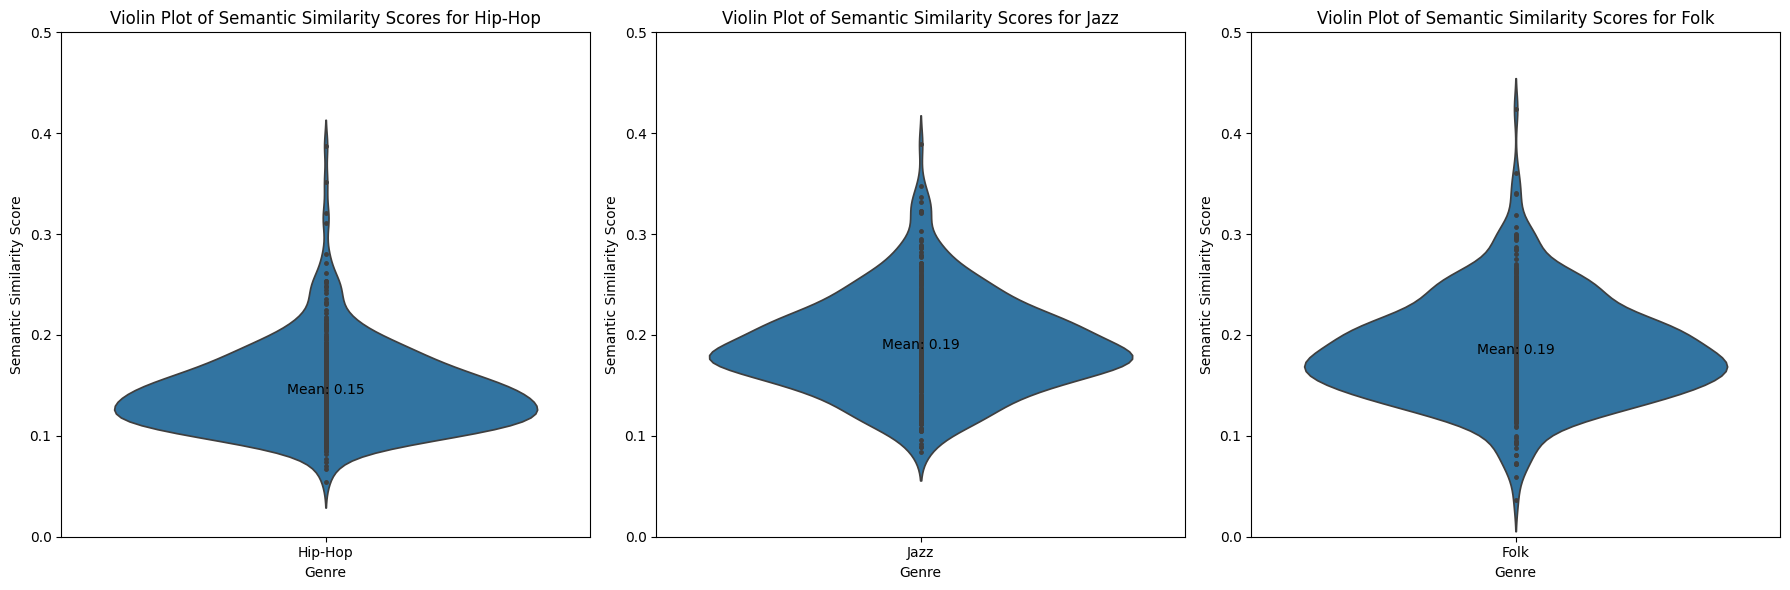

In [28]:
# Calculate the means for each genre
mean_values = sampled_songs_df.groupby('Genre')['similarity'].mean().reset_index()

# Determine the y-axis limits based on the global min and max similarity scores
y_min = 0
y_max = sampled_songs_df['similarity'].max()

# Round up the max to the nearest number that ends with a 0 for extra space on top
rounded_y_max = np.ceil(y_max / 0.1) * 0.1

# Set plot size for each subplot
plt.figure(figsize=(18, 6))

# Create a separate violin plot for each genre
for i, genre in enumerate(sampled_songs_df['Genre'].unique()):
    plt.subplot(1, 3, i+1)  # Assuming there are 3 genres; adjust the number of subplots as needed

    # Subset the DataFrame for the current genre
    genre_data = sampled_songs_df[sampled_songs_df['Genre'] == genre]

    # Create violin plot for the current genre
    sns.violinplot(data=genre_data, x='Genre', y='similarity', inner='point')

    # Get the mean value for the current genre
    mean_value = mean_values[mean_values['Genre'] == genre]['similarity'].values[0]

    # Annotate the mean value on the plot
    plt.text(x=0, y=mean_value, s=f"Mean: {mean_value:.2f}", color='black', va='center', ha='center')

    # Set the y-axis to a rounded maximum for neatness and a little extra space on top
    plt.ylim(y_min, rounded_y_max)

    # Set title, labels, etc.
    plt.title(f'Violin Plot of Semantic Similarity Scores for {genre}')
    plt.xlabel('Genre')
    plt.ylabel('Semantic Similarity Score')

# Adjust the layout so plots are not overlapping
plt.tight_layout()
plt.show()

### **Statistical Analysis**

**Null Hypothesis (H0):**

There is no significant difference in semantic similarity scores within song lyrics between the Hip-Hop, Jazz and Folk genres.


**Alternative Hypothesis (H1):**

Hip-Hop songs will have a lower level of semantic similarity within their lyrics compared to Jazz songs and also compared to Folk songs. Hip-Hop often includes innovative language use, a wide array of topics addressing social and personal themes, and frequent cultural references that contribute to a high degree of lyrical diversity. This stands in contrast to Jazz and Folk genres, which may exhibit more consistent themes and language within their lyrics, leading to higher semantic similarity scores.

In [29]:
# filter semantic similarity scores for each genre
hiphop_similarity = sampled_songs_df[sampled_songs_df['Genre'] == 'Hip-Hop']['similarity']
jazz_similarity = sampled_songs_df[sampled_songs_df['Genre'] == 'Jazz']['similarity']
folk_similarity = sampled_songs_df[sampled_songs_df['Genre'] == 'Folk']['similarity']

# Perform the ANOVA
anova_result = stats.f_oneway(hiphop_similarity, jazz_similarity, folk_similarity)

# Print the ANOVA results
print('ANOVA result: F-statistic =', anova_result.statistic, 'p-value =', anova_result.pvalue)

ANOVA result: F-statistic = 107.87127513160438 p-value = 8.445552305786611e-44


The ANOVA results indicate a highly significant difference in the mean semantic similarity scores among the Hip-Hop, Folk, and Jazz genres. With an F-statistic of 107.871 and an extremely small p-value of approximately 8.45e-44, I can reject the null hypothesis that there are no differences among the means. These results suggest that there are significant differences in the lyrical semantic similarity across the genres being compared.



In [30]:
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=sampled_songs_df['similarity'], groups=sampled_songs_df['Genre'], alpha=0.05)

# Display the results
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   Folk Hip-Hop  -0.0392    0.0  -0.047 -0.0315   True
   Folk    Jazz   0.0052 0.2639 -0.0026  0.0129  False
Hip-Hop    Jazz   0.0444    0.0  0.0366  0.0521   True
------------------------------------------------------


The Tukey HSD post-hoc test results show pairwise comparisons of the mean semantic similarity scores between the three genres: Folk, Hip-Hop, and Jazz.

* **Folk vs. Hip-Hop**: The mean difference is -0.0392 with a p-value of 0.0 (indicating p < 0.05), leading to the rejection of the null hypothesis. This means Folk songs have a higher level of semantic similarity compared to Hip-Hop, which supports my hypothesis that Hip-Hop has a lower level of semantic similarity.

* **Folk vs. Jazz**: The mean difference is 0.0052 with a p-value of 0.2639, which is not statistically significant (p > 0.05). This indicates that there isn't enough evidence to suggest a significant difference in semantic similarity scores between Folk and Jazz genres.

* **Hip-Hop vs. Jazz**: The mean difference is 0.0444 with a p-value of 0.0 (indicating p < 0.05), warranting the rejection of the null hypothesis. Jazz songs have a higher level of semantic similarity compared to Hip-Hop, which again aligns with the hypothesis.

In summary, these results are consistent with the hypothesis. Hip-Hop lyrics are significantly less semantically similar than both Folk and Jazz lyrics. The statistical analysis supports the idea that the wide array of themes and the innovative use of language in Hip-Hop lead to more unique lyrics within the genre, while Folk and Jazz may have more thematic consistency, reflected in their relatively higher semantic similarity scores.

### **Conclusion**

This analysis has given a deeper understanding of how the semantics of song lyrics vary across genres. By examining the lyrical content of Hip-Hop, Folk, and Jazz songs, my initial hypothesis was empirically supported through statistical testing. The one-way ANOVA showed a significant difference in semantic similarity across the three genres, which was further dissected by Tukey's HSD post-hoc analysis to reveal where these differences lay.

Consistent with the hypothesis, Hip-Hop was found to have a significantly lower level of semantic similarity in its lyrics compared to Folk and Jazz. This suggests that Hip-Hop artists are using a broader range of vocabulary and themes, leading to less repetition and therefore lower semantic similarity within songs. This diversity aligns with the recognized expressive nature of Hip-Hop and its roots in addressing a wide spectrum of experiences and narratives.

In contrast, the differences in semantic similarity between Folk and Jazz were not statistically significant. This result may point to a shared lyrical consistency or perhaps shared thematic underpinnings typical of the respective genres' historical development and cultural contexts.

This study contributes to the broader effort to understand the relationship between music genres and language use. The findings endorse the potential for semantic similarity measures to play a significant role in the categorization of songs, offering an analytical lens to discern the nuanced ways in which lyrics reflect their musical genres.

Moreover, this research adds a quantitative backbone to what many listeners intuitively perceive — that genres encapsulate distinct styles not just musically but also in their lyrical narratives. It provides a stepping stone for further investigations that could include a more extensive array of genres or dive deeper into the implications of these findings.

In sum, the insights gained from this study affirm the hypothesis that Hip-Hop music possesses an intrinsic diversity in its lyrics, thus enriching our appreciation for the genre's artistry and the complexity of its linguistic expression.


### **References**

Dataset source: https://www.kaggle.com/datasets/mateibejan/multilingual-lyrics-for-genre-classification
